# Google Play Store App Scraper

## Importing Libraries

In [1]:
import json
import pandas as pd
from tqdm import tqdm
import json

import seaborn as sns
import matplotlib.pyplot as plt

from pygments import highlight
from pygments.lexers import JsonLexer
from pygments.formatters import TerminalFormatter

from google_play_scraper import Sort, reviews, app, search

%matplotlib inline
%config InlineBackend.figure_format='retina'

sns.set(style='whitegrid', palette='muted', font_scale=1.2)

## Searching for apps in the Google Play

In [2]:
result_search = search(
    "Social Media",
    lang="en",  # defaults to 'en'
    country="gr",  # defaults to 'us'
    n_hits=30  # defaults to 30 (= Google's maximum)
)

### Printing all the result search

In [3]:
#Uncomment to see the results of the search
#result_search

## Getting the necessary info from the scrape

In [4]:
# Create a list of dictionaries with the extracted data
extracted_data = [{'appId': entry['appId'], 'title': entry['title'], 'score': entry['score'], 'genre': entry['genre'], 'icon': entry['icon']} for entry in result_search]

# Create a DataFrame from the list of dictionaries
df = pd.DataFrame(extracted_data)

df

,appId,title,score,genre,icon
0,com.snapchat.android,Snapchat,4.303860,Communication,https://play-lh.googleusercontent.com/KxeSAjPT...
1,com.instagram.android,Instagram,4.097683,Social,https://play-lh.googleusercontent.com/VRMWkE5p...
2,com.reddit.frontpage,Reddit,3.788748,Social,https://play-lh.googleusercontent.com/EPRVXJ3k...
3,com.zhiliaoapp.musically,TikTok,4.395389,Social,https://play-lh.googleusercontent.com/LdBITldj...
4,com.facebook.katana,Facebook,3.925502,Social,https://play-lh.googleusercontent.com/KCMTYuiT...
5,com.twitter.android,X,4.060943,Social,https://play-lh.googleusercontent.com/A-Rnrh0J...
6,com.bereal.ft,BeReal. Your friends for real.,4.462963,Social,https://play-lh.googleusercontent.com/8Lu1K0dD...
7,com.pinterest,Pinterest,4.632037,Lifestyle,https://play-lh.googleusercontent.com/dVsv8Hc4...
8,com.facebook.lite,Facebook Lite,4.029301,Social,https://play-lh.googleusercontent.com/Tll2LETW...
9,com.vkontakte.android,"VK: music, video, messenger",4.354037,Social,https://play-lh.googleusercontent.com/GntsGclz...


### Just printing the logos of the scraped apps from the Google Play Store

In [5]:
from IPython.display import HTML

# Assuming you have a DataFrame named 'df' with a column 'icon' containing image URLs
html = "<div style='display: flex; flex-wrap: wrap;'>"
for index, row in df.iterrows():
    img_url = row['icon']
    html += f"<div style='margin: 10px;'><img src='{img_url}' style='width: 150px;'></div>"
html += "</div>"

HTML(html)

## App Reviews

### Testing for one app only

In [6]:
df['appId'][1]

'com.instagram.android'

In [7]:
# Sort.NEWEST (default): Sort reviews by the newest first.
# Sort.RATING: Sort reviews by the highest rating first.
# Sort.HELPFULNESS: Sort reviews by the most helpful first.


result_reviews, continuation_token = reviews(
    df['appId'][1],
    lang='en', # defaults to 'en'
    country='gr', # defaults to 'us'
    sort=Sort.NEWEST, # defaults to Sort.NEWEST
    count=200, # defaults to 100
    filter_score_with=None # defaults to None(means all score)
)

# If you pass `continuation_token` as an argument to the reviews function at this point,
# it will crawl the items after 3 review items.

result_reviews, _ = reviews(
    df['appId'][1],
    continuation_token=continuation_token # defaults to None(load from the beginning)
)

In [8]:
#Uncomment to see the results of the search
#result_reviews

In [9]:
result_reviews[4]

{'reviewId': '0f2e3d69-c293-4c63-80e3-1c64009d0ac4',
 'userName': 'Linda Taylor',
 'userImage': 'https://play-lh.googleusercontent.com/a-/ALV-UjUdP2qn0Cfmk_GDStIVfow_1IWNQIQZnL9yrcGVhIX1sNw',
 'content': 'Great way to show people things you do',
 'score': 5,
 'thumbsUpCount': 3,
 'reviewCreatedVersion': '304.0.0.35.106',
 'at': datetime.datetime(2023, 10, 14, 1, 26, 29),
 'replyContent': None,
 'repliedAt': None,
 'appVersion': '304.0.0.35.106'}

### Going for all the apps in the aforementioned DataFrame

In [10]:
app_reviews = []

for ap in tqdm(df['appId']):
  for score in list(range(1, 6)):
    for sort_order in [Sort.MOST_RELEVANT, Sort.NEWEST]:
      rvs, _ = reviews(
        ap,
        lang='en',
        country='gr',
        sort=sort_order,
        count= 200 if score == 3 else 100, #Going with that in order to create a balanced dataset, because most of the apps are towards 5 stars rating
        filter_score_with=score
      )
      for r in rvs:
        r['sortOrder'] = 'most_relevant' if sort_order == Sort.MOST_RELEVANT else 'newest'
        r['appId'] = ap
      app_reviews.extend(rvs)

100%|███████████████████████████████████████████| 23/23 [02:19<00:00,  6.06s/it]


In [11]:
#Printing one just to be sure
print(app_reviews[0])

{'reviewId': '83fa6326-f1e4-4d96-a04c-05a4146d7045', 'userName': 'Sarah', 'userImage': 'https://play-lh.googleusercontent.com/a-/ALV-UjUEaj4EaVvh04ag0IQ4UPSF54zVDpCVF5d5Recq1ZzWNg', 'content': "Horeible. Why can't you fix your app so that when a person makes a continuous video. When you click on there page to get the second video you can't find it.!!! Can you please make it easier for user to find the continuous video. This really upsets me. I watch a video and they say they have to continue it in another video and we'll you can't find it. It makes me mad!!. Gosh make it easier for your users!! I will change ratings once it's done!!", 'score': 1, 'thumbsUpCount': 20594, 'reviewCreatedVersion': '12.56.0.57', 'at': datetime.datetime(2023, 10, 18, 11, 31, 44), 'replyContent': None, 'repliedAt': None, 'appVersion': '12.56.0.57', 'sortOrder': 'most_relevant', 'appId': 'com.snapchat.android'}


In [12]:
#Total Rows of the dataset // Total Reviews for all the apps
len(app_reviews)

25630

In [13]:
#Saving all the ratings into one csv file with the name reviews.csv
app_reviews_df = pd.DataFrame(app_reviews)
app_reviews_df.to_csv('reviews.csv', index=None, header=True)

# Data Collection and Preprocessing

## Load and inspect the dataset

In [19]:
import pandas as pd

# Load the dataset
reviews_df = pd.read_csv('reviews.csv')

# Display the first few rows
reviews_df.head()

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion,sortOrder,appId
0,83fa6326-f1e4-4d96-a04c-05a4146d7045,Sarah,https://play-lh.googleusercontent.com/a-/ALV-U...,Horeible. Why can't you fix your app so that w...,1,20594,12.56.0.57,2023-10-18 11:31:44,NaN,NaN,12.56.0.57,most_relevant,com.snapchat.android
1,0a63adf4-88b9-467f-81b2-cc0bb3c488d1,Anjay Lindgren,https://play-lh.googleusercontent.com/a-/ALV-U...,Revising edit. This apps bugs just keep gettin...,1,7215,12.56.0.57,2023-10-17 19:39:00,NaN,NaN,12.56.0.57,most_relevant,com.snapchat.android
2,ba084ee6-b18c-4cab-9682-507b4bdffd87,Ryan Kargel,https://play-lh.googleusercontent.com/a-/ALV-U...,Absolutely terrible experience on Android. I h...,1,21425,12.48.1.0,2023-08-26 20:18:34,NaN,NaN,12.48.1.0,most_relevant,com.snapchat.android
3,20982232-e7b0-4e6b-a143-44692076ed78,casey goodwin,https://play-lh.googleusercontent.com/a-/ALV-U...,Snap on a tablet is completely useless. The ca...,1,58,12.57.0.55,2023-10-26 21:10:18,NaN,NaN,12.57.0.55,most_relevant,com.snapchat.android
4,548b65b8-d2d3-44f3-97fb-46b0a7af3a65,Brody Townsend,https://play-lh.googleusercontent.com/a-/ALV-U...,"The discover is terrible, the spotlight is als...",1,2909,12.55.0.56,2023-10-19 05:09:23,NaN,NaN,12.55.0.56,most_relevant,com.snapchat.android


## Drop duplicate reviews based on content

In [20]:
reviews_df.drop_duplicates(subset='content', inplace=True)

## Remove columns that might contain PII or are not relevant

In [21]:
columns_to_drop = ['reviewId', 'userName', 'userImage', 'replyContent', 'repliedAt']
reviews_df.drop(columns=columns_to_drop, inplace=True)

## Clean, tokenize, stem, and remove stopwords from the review content

In [22]:
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS
from nltk.stem import SnowballStemmer
import re

def clean_tokenize(text):
    text = text.lower()
    text = re.sub(r'[^a-z\s]', '', text)
    words = text.split()
    words = [word for word in words if word not in ENGLISH_STOP_WORDS]
    stemmer = SnowballStemmer(language='english')
    words = [stemmer.stem(word) for word in words]
    return ' '.join(words)

reviews_df['content'].fillna("missing_content", inplace=True)
reviews_df['cleaned_content'] = reviews_df['content'].apply(clean_tokenize)

# Indexing and Retrieval

## Build an inverted index

In [23]:
from collections import defaultdict

def build_inverted_index(df):
    inverted_index = defaultdict(set)
    for idx, content in df['cleaned_content'].items():
        for word in content.split():
            inverted_index[word].add(idx)
    return inverted_index

inverted_index = build_inverted_index(reviews_df)

## Positional Index

In [24]:
def build_positional_index(df):
    positional_index = defaultdict(lambda: defaultdict(list))
    for idx, content in df['cleaned_content'].items():
        for position, word in enumerate(content.split()):
            positional_index[word][idx].append(position)
    return positional_index

positional_index = build_positional_index(reviews_df)

## Use TF-IDF to rank reviews based on relevance

In [25]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer()
tfidf_matrix = vectorizer.fit_transform(reviews_df['cleaned_content'])

# Query Processing

## Implement query expansion using synonyms (a simple example using NLTK's WordNet)

In [26]:
#Import and download the required library
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /Users/alkis/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [27]:
from nltk.corpus import wordnet

def expand_query(query):
    synonyms = set()
    for word in query.split():
        for syn in wordnet.synsets(word):
            for lemma in syn.lemmas():
                synonyms.add(lemma.name())
    return " ".join(synonyms)

expanded_query = expand_query("example_query")

## Boolean Retrieval

In [28]:
def boolean_search(query, index):
    terms = [term for term in query.split() if term not in ['AND', 'OR', 'NOT']]
    sets = [set(index.get(term, {})) for term in terms]

    if 'AND' in query:
        result = set.intersection(*sets)
    elif 'OR' in query:
        result = set.union(*sets)
    elif 'NOT' in query:
        result = sets[0] - sets[1]
    else:
        result = sets[0]

    return result

# Example usage
results = boolean_search('performance AND good', inverted_index)

# Sentiment Analysis

## Perform sentiment analysis

In [29]:
from textblob import TextBlob

def get_sentiment(text):
    analysis = TextBlob(text)
    if analysis.sentiment.polarity > 0:
        return 'positive'
    elif analysis.sentiment.polarity == 0:
        return 'neutral'
    else:
        return 'negative'

reviews_df['sentiment'] = reviews_df['content'].apply(get_sentiment)

## Aspect-Based Sentiment Analysis

In [30]:
aspects = ['performance', 'user interface', 'customer support']

def aspect_sentiment(text):
    aspect_sentiments = {}
    for aspect in aspects:
        if aspect in text:
            sentiment = get_sentiment(text)
            aspect_sentiments[aspect] = sentiment
    return aspect_sentiments

reviews_df['aspect_sentiments'] = reviews_df['content'].apply(aspect_sentiment)

## Identify frequent aspects and determine sentiment

In [31]:
#Importing and downloading the required libraries
import nltk
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/alkis/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [33]:
from collections import Counter
import nltk

def identify_common_nouns(texts, n=10):
    all_words = nltk.word_tokenize(" ".join(texts))
    nouns = [word for word, pos in nltk.pos_tag(all_words) if pos in ['NN', 'NNS']]
    common_nouns = Counter(nouns).most_common(n)
    return [noun[0] for noun in common_nouns]

aspects = identify_common_nouns(reviews_df['content'])

In [34]:
aspects

['app',
 'time',
 'people',
 'video',
 'i',
 'account',
 'phone',
 'videos',
 'problem',
 'friends']

# Recommendation System

## Recommend apps based on user queries and review sentiments

In [35]:
from sklearn.metrics.pairwise import cosine_similarity

def recommend_apps(query):
    query_vector = vectorizer.transform([query])
    cosine_sim = cosine_similarity(query_vector, tfidf_matrix)
    recommended_apps = reviews_df.iloc[cosine_sim.argsort()[0, -5:]]
    return recommended_apps['appId']

recommended_apps_list = recommend_apps("camera quality")

In [36]:
recommended_apps_list

14127    tv.twitch.android.app
714       com.snapchat.android
979       com.snapchat.android
647       com.snapchat.android
672       com.snapchat.android
Name: appId, dtype: object

In [37]:
def recommend_apps_analytical(query):
    query_vector = vectorizer.transform([query])
    cosine_sim = cosine_similarity(query_vector, tfidf_matrix)
    reviews_df['relevance'] = cosine_sim[0]
    relevant_reviews = reviews_df.sort_values(by='relevance', ascending=False).head(10)
    positive_reviews = relevant_reviews[relevant_reviews['sentiment'] == 'positive']
    return positive_reviews['appId']

recommended_apps_list_analytical = recommend_apps_analytical("camera quality")

In [38]:
recommended_apps_list_analytical

647       com.snapchat.android
979       com.snapchat.android
14127    tv.twitch.android.app
7762             com.bereal.ft
7780             com.bereal.ft
15956           me.zepeto.main
Name: appId, dtype: object

# User Feedback Analysis

## Identify common issues or concerns

In [39]:
from collections import Counter

def common_issues(df, n=5):
    all_words = " ".join(df['cleaned_content']).split()
    word_counts = Counter(all_words)
    return word_counts.most_common(n)

top_issues = common_issues(reviews_df)

## Deep Dive into Common Issues

In [40]:
def deep_dive_into_issues(df, n=5):
    issues = common_issues(df, n)
    issue_sentiments = {}
    for issue, _ in issues:
        sentiments = df[df['cleaned_content'].str.contains(issue)]['sentiment'].value_counts()
        issue_sentiments[issue] = sentiments.to_dict()
    return issue_sentiments

deep_dive_results = deep_dive_into_issues(reviews_df)

In [41]:
deep_dive_results

{'app': {'positive': 7093, 'negative': 2605, 'neutral': 712},
 'like': {'positive': 2711, 'negative': 862, 'neutral': 218},
 'use': {'positive': 3006, 'negative': 1165, 'neutral': 168},
 'just': {'positive': 2003, 'negative': 882, 'neutral': 159},
 'video': {'positive': 1481, 'negative': 610, 'neutral': 178}}

# Topic Modeling

## Apply LDA to extract topics

In [42]:
from sklearn.decomposition import LatentDirichletAllocation

n_topics = 5
lda = LatentDirichletAllocation(n_components=n_topics)
topic_matrix = lda.fit_transform(tfidf_matrix)

def get_top_words(lda_model, feature_names, n_words=5):
    topics = {}
    for topic_idx, topic in enumerate(lda_model.components_):
        top_words = [feature_names[i] for i in topic.argsort()[:-n_words - 1:-1]]
        topics[f"Topic {topic_idx}"] = top_words
    return topics

feature_names = vectorizer.get_feature_names_out()
topics = get_top_words(lda, feature_names)

## Extract meaningful topics and understand their sentiment

In [43]:
def topic_sentiment(lda_model, tfidf_matrix, df):
    topic_matrix = lda_model.transform(tfidf_matrix)
    df['topic'] = topic_matrix.argmax(axis=1)
    topic_sentiments = df.groupby('topic')['sentiment'].value_counts().unstack().fillna(0)
    return topic_sentiments

topic_sentiments_df = topic_sentiment(lda, tfidf_matrix, reviews_df)

In [44]:
topic_sentiments_df

sentiment,negative,neutral,positive
topic,,,
0,141,1143,996
1,90,364,751
2,67,379,321
3,94,302,436
4,4298,2091,9769


# Evaluation

In [45]:
def evaluate_recommendation(query):
    recommended_apps = recommend_apps_analytical(query)
    avg_sentiment = reviews_df[reviews_df['appId'].isin(recommended_apps)]['sentiment'].value_counts(normalize=True)
    return avg_sentiment

recommendation_evaluation = evaluate_recommendation("camera quality")

In [46]:
recommendation_evaluation

positive    0.596558
negative    0.240679
neutral     0.162763
Name: sentiment, dtype: float64

# Visualization

## Visualize sentiment distributions

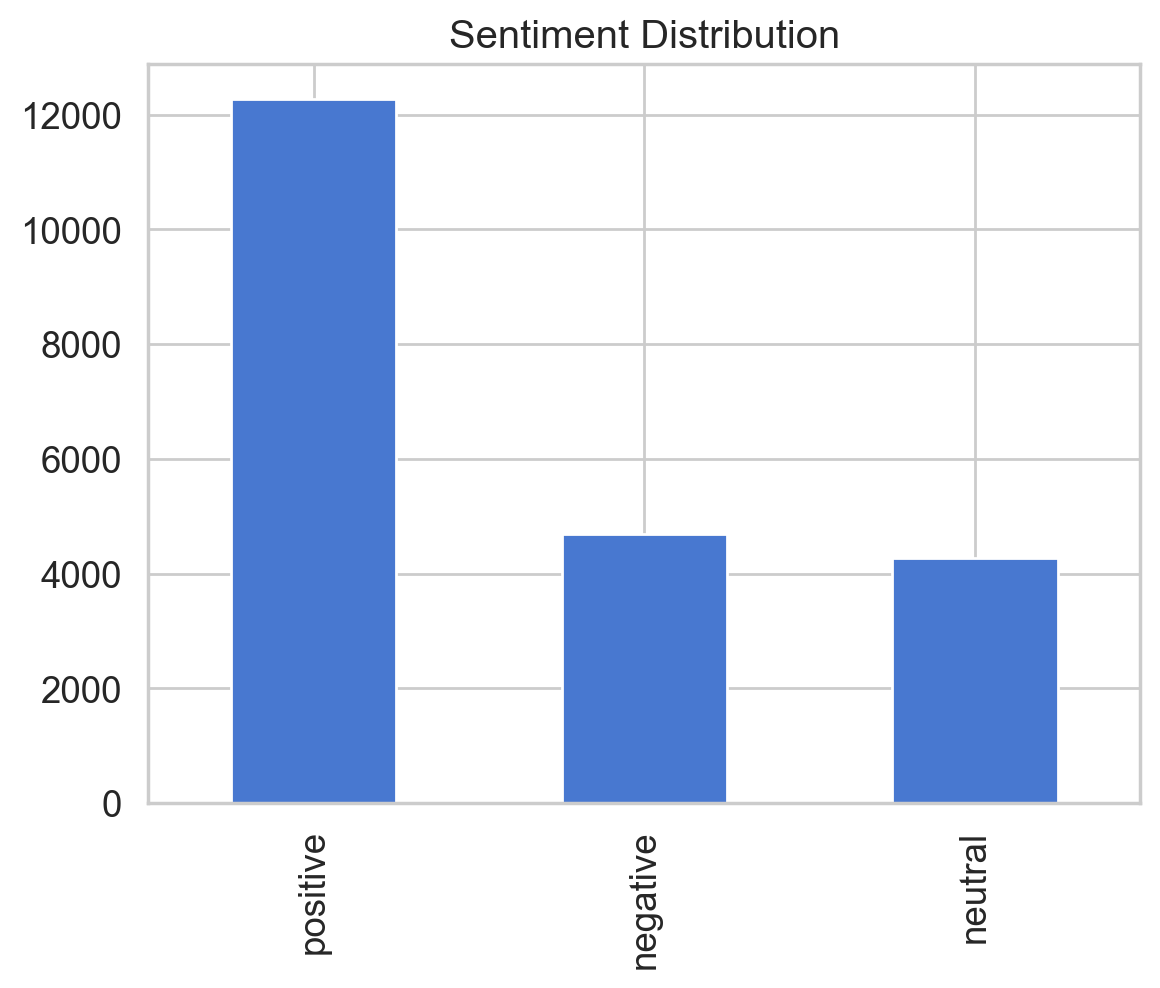

In [47]:
import matplotlib.pyplot as plt

sentiment_counts = reviews_df['sentiment'].value_counts()
sentiment_counts.plot(kind='bar', title='Sentiment Distribution')
plt.show()

## Visualize Aspect Sentiments

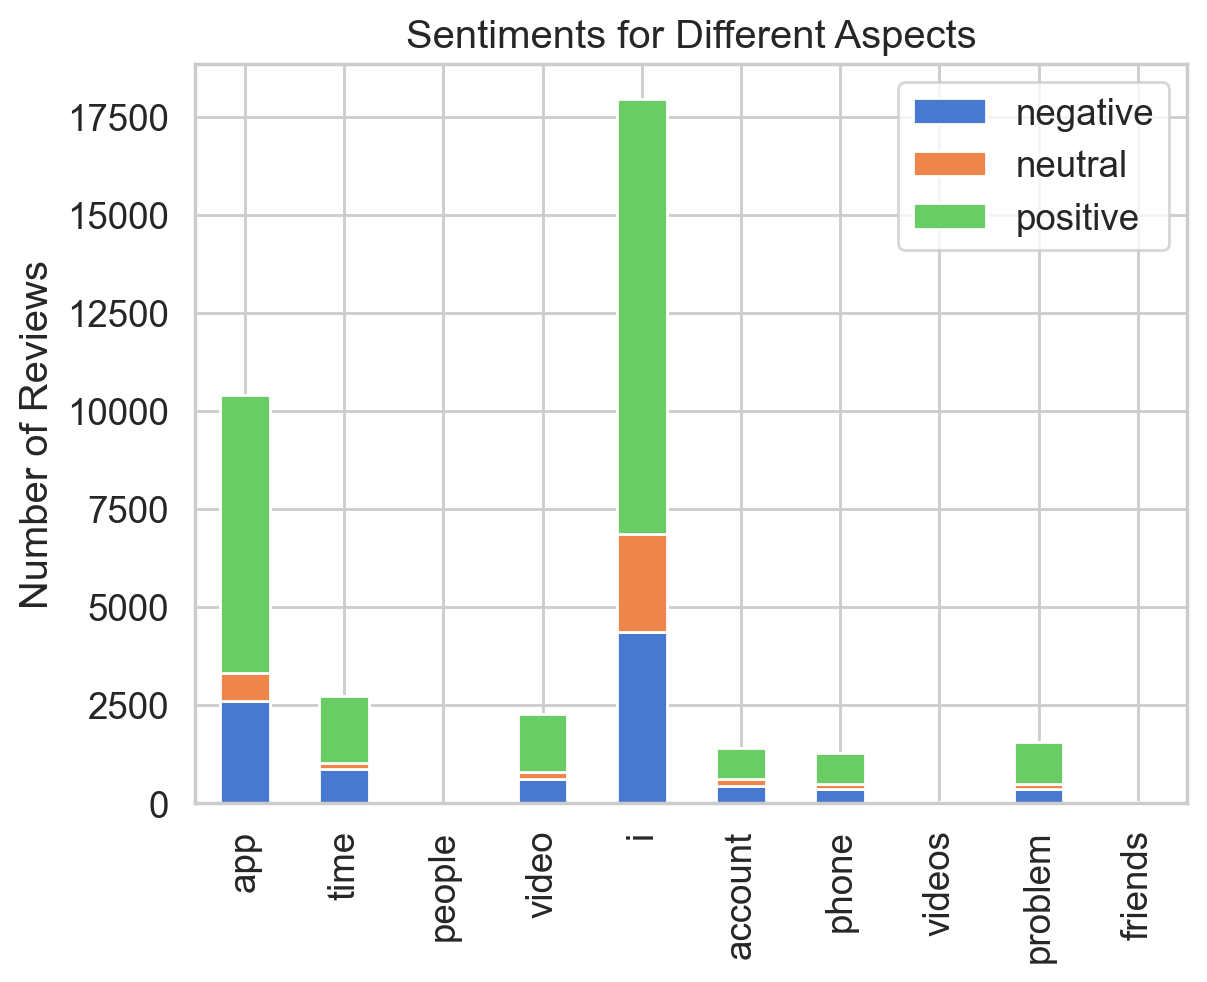

In [48]:
def plot_aspect_sentiments(df, aspects):
    aspect_counts = {aspect: df[df['cleaned_content'].str.contains(aspect)]['sentiment'].value_counts() for aspect in aspects}
    df_aspect = pd.DataFrame(aspect_counts).T.fillna(0)
    df_aspect.plot(kind='bar', stacked=True, title="Sentiments for Different Aspects")
    plt.ylabel('Number of Reviews')
    plt.show()

plot_aspect_sentiments(reviews_df, aspects)

# Machine Learning

## Clustering

In [51]:
from sklearn.cluster import KMeans

num_clusters = 5
kmeans = KMeans(n_clusters=num_clusters)
reviews_df['cluster'] = kmeans.fit_predict(tfidf_matrix)

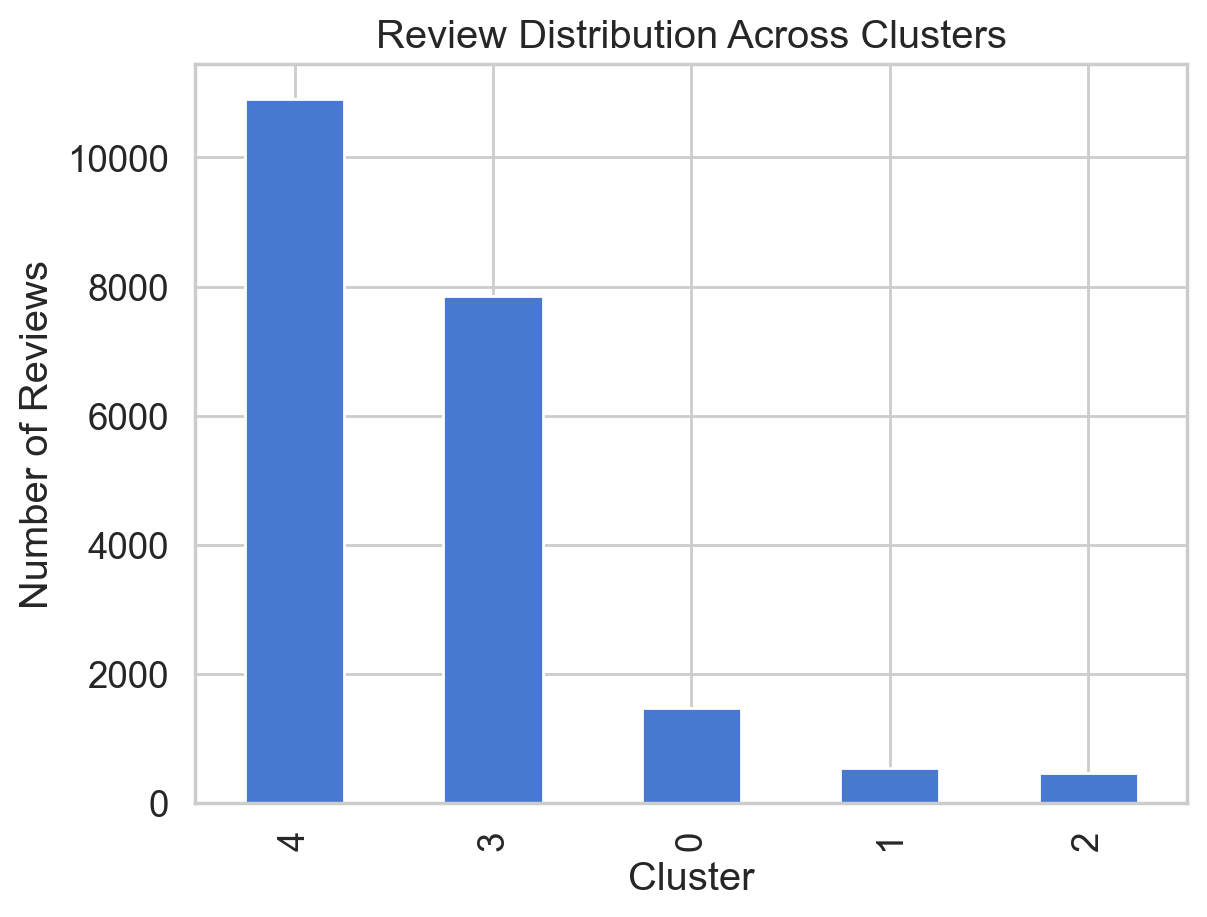

In [52]:
import matplotlib.pyplot as plt

def plot_clusters(df):
    cluster_counts = df['cluster'].value_counts()
    cluster_counts.plot(kind='bar', title='Review Distribution Across Clusters')
    plt.xlabel('Cluster')
    plt.ylabel('Number of Reviews')
    plt.show()

plot_clusters(reviews_df)

## Classification

In [53]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.preprocessing import LabelEncoder

X = tfidf_matrix
le = LabelEncoder()
y = le.fit_transform(reviews_df['sentiment'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

clf = MultinomialNB()
clf.fit(X_train, y_train)
accuracy = clf.score(X_test, y_test)

In [54]:
from sklearn.metrics import classification_report

y_pred = clf.predict(X_test)
print(f"Classification Accuracy: {accuracy}")
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred, target_names=le.classes_))

Classification Accuracy: 0.6062602965403624

Classification Report:

              precision    recall  f1-score   support

    negative       0.75      0.04      0.07       915
     neutral       0.90      0.11      0.19       871
    positive       0.60      0.99      0.75      2463

    accuracy                           0.61      4249
   macro avg       0.75      0.38      0.34      4249
weighted avg       0.69      0.61      0.49      4249



# Deep Learning

## Word Embeddings

In [55]:
from gensim.models import Word2Vec

sentences = reviews_df['cleaned_content'].str.split().tolist()
model = Word2Vec(sentences=sentences, vector_size=100, window=5, min_count=1, workers=4)
model.save("word2vec.model")

In [56]:
def similar_words(word, model):
    if word in model.wv:
        return model.wv.most_similar(word)
    else:
        return f"The word '{word}' is not in the model's vocabulary."

word = "performance"
print(f"Words similar to '{word}':\n")
print(similar_words(word, model))

Words similar to 'performance':

The word 'performance' is not in the model's vocabulary.


In [57]:
def similar_words(word, model):
    if word in model.wv:
        return model.wv.most_similar(word)
    else:
        return f"The word '{word}' is not in the model's vocabulary."

word = "camera"
print(f"Words similar to '{word}':\n")
print(similar_words(word, model))

Words similar to 'camera':

[('rear', 0.9819891452789307), ('gif', 0.9812352657318115), ('thumbnail', 0.9779322147369385), ('crop', 0.9703361392021179), ('background', 0.9659807682037354), ('fullscreen', 0.9652870297431946), ('auto', 0.9649605751037598), ('length', 0.9624488353729248), ('blurri', 0.9609609842300415), ('resolut', 0.9608592987060547)]


# Similarity Measures | Jaccard Index

In [58]:
def jaccard_similarity(set1, set2):
    intersection_len = len(set1.intersection(set2))
    union_len = len(set1.union(set2))
    return intersection_len / union_len

In [59]:
set1 = set("The camera quality is excellent".split())
set2 = set("The camera is good".split())
similarity = jaccard_similarity(set1, set2)
print(f"Jaccard similarity between '{' '.join(set1)}' and '{' '.join(set2)}' is: {similarity}")

Jaccard similarity between 'excellent The quality camera is' and 'good is The camera' is: 0.5


-----------------

# Testing

## AI Methodologies for Content Matching | Named Entity Recognition (NER)

In [ ]:
import spacy

nlp = spacy.load('en_core_web_sm')

def extract_entities(text):
    doc = nlp(text)
    return [(ent.text, ent.label_) for ent in doc.ents]

reviews_df['entities'] = reviews_df['content'].apply(extract_entities)